In [2]:
#Import libraries
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as iter

In [3]:
dataPull = pd.read_csv("Stores.csv")
dataPull.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
dataPull.iloc[-1][-3]

1429

In [5]:
dataPull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [6]:
#This data is pulled from: 
#https://www.kaggle.com/surajjha101/stores-area-and-sales-data

### Descriptions
Store ID: (Index) ID of the particular store.

Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

Daily_Customer_Count: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made per day.

In [7]:
#get rid of storeID, it is useless.
filter = ["Store ID ", "Store ID"]
k = [s for s in dataPull.columns if s not in filter]
#then make a new dataframe
data = pd.DataFrame(dataPull[k])
data.head(n = 20)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
5,1442,1733,760,45260
6,1542,1858,1030,72240
7,1261,1507,1020,37720
8,1090,1321,680,46310
9,1030,1235,1130,44150


In [8]:
#Describe the focused data
data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [9]:
#Now we can explore the data. 
#first we define the various variable spaces. 
column_space = data.columns
#get pairs between data 
pair_space_columns = list(iter.combinations(column_space, 2))
#get concatenated spaces
jointDF_pairs = []
for pairs in pair_space_columns:
    paired_df = pd.concat([data[pairs[0]], data[pairs[1]]], axis = 1).reindex(data[pairs[0]].index)
    jointDF_pairs.append(paired_df)
#if lazy, call for list, list and more list
data_space = [data, column_space, pair_space_columns, jointDF_pairs]

# Start Exploring the data! 

First, I will just do boxplot, hist and violinplot of the 4 variables. 

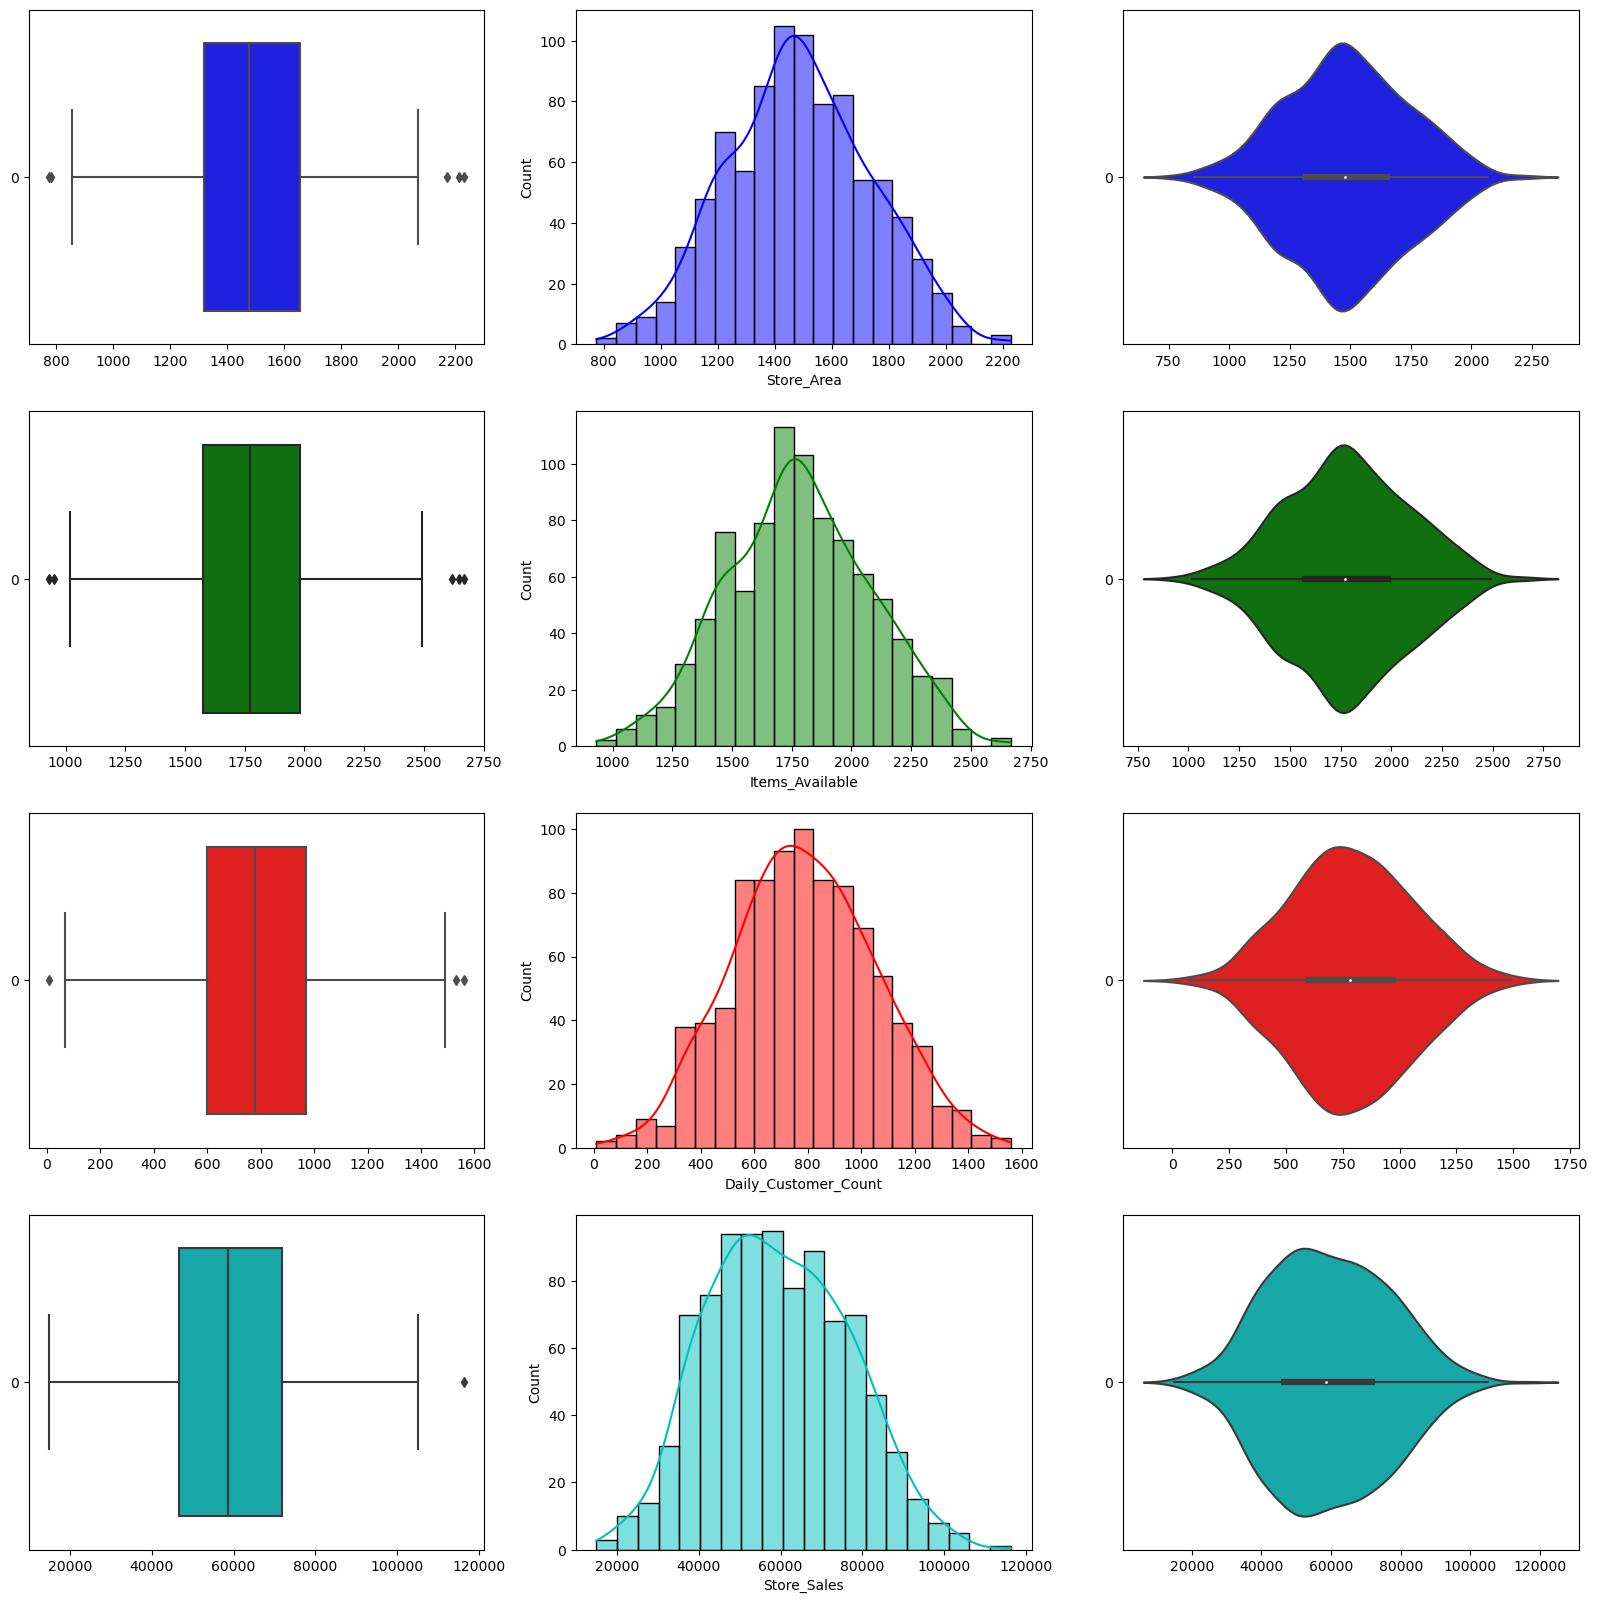

In [10]:
import matplotlib.colors as color
#get color space
color_space = list(color.BASE_COLORS.keys())
#plot boxplot, histplot and violinplot all in one go
f, axes = plt.subplots(len(data_space[1]), 3, figsize = (20, 20))
row = 0
for s in data_space[0]:
    sb.boxplot(data = data_space[0][s], orient = 'h', color = color_space[row], ax = axes[row, 0])
    sb.histplot(data = data_space[0][s], kde = True, color = color_space[row], ax = axes[row, 1])
    sb.violinplot(data = data_space[0][s], orient = 'h', color = color_space[row], ax = axes[row, 2])
    row += 1

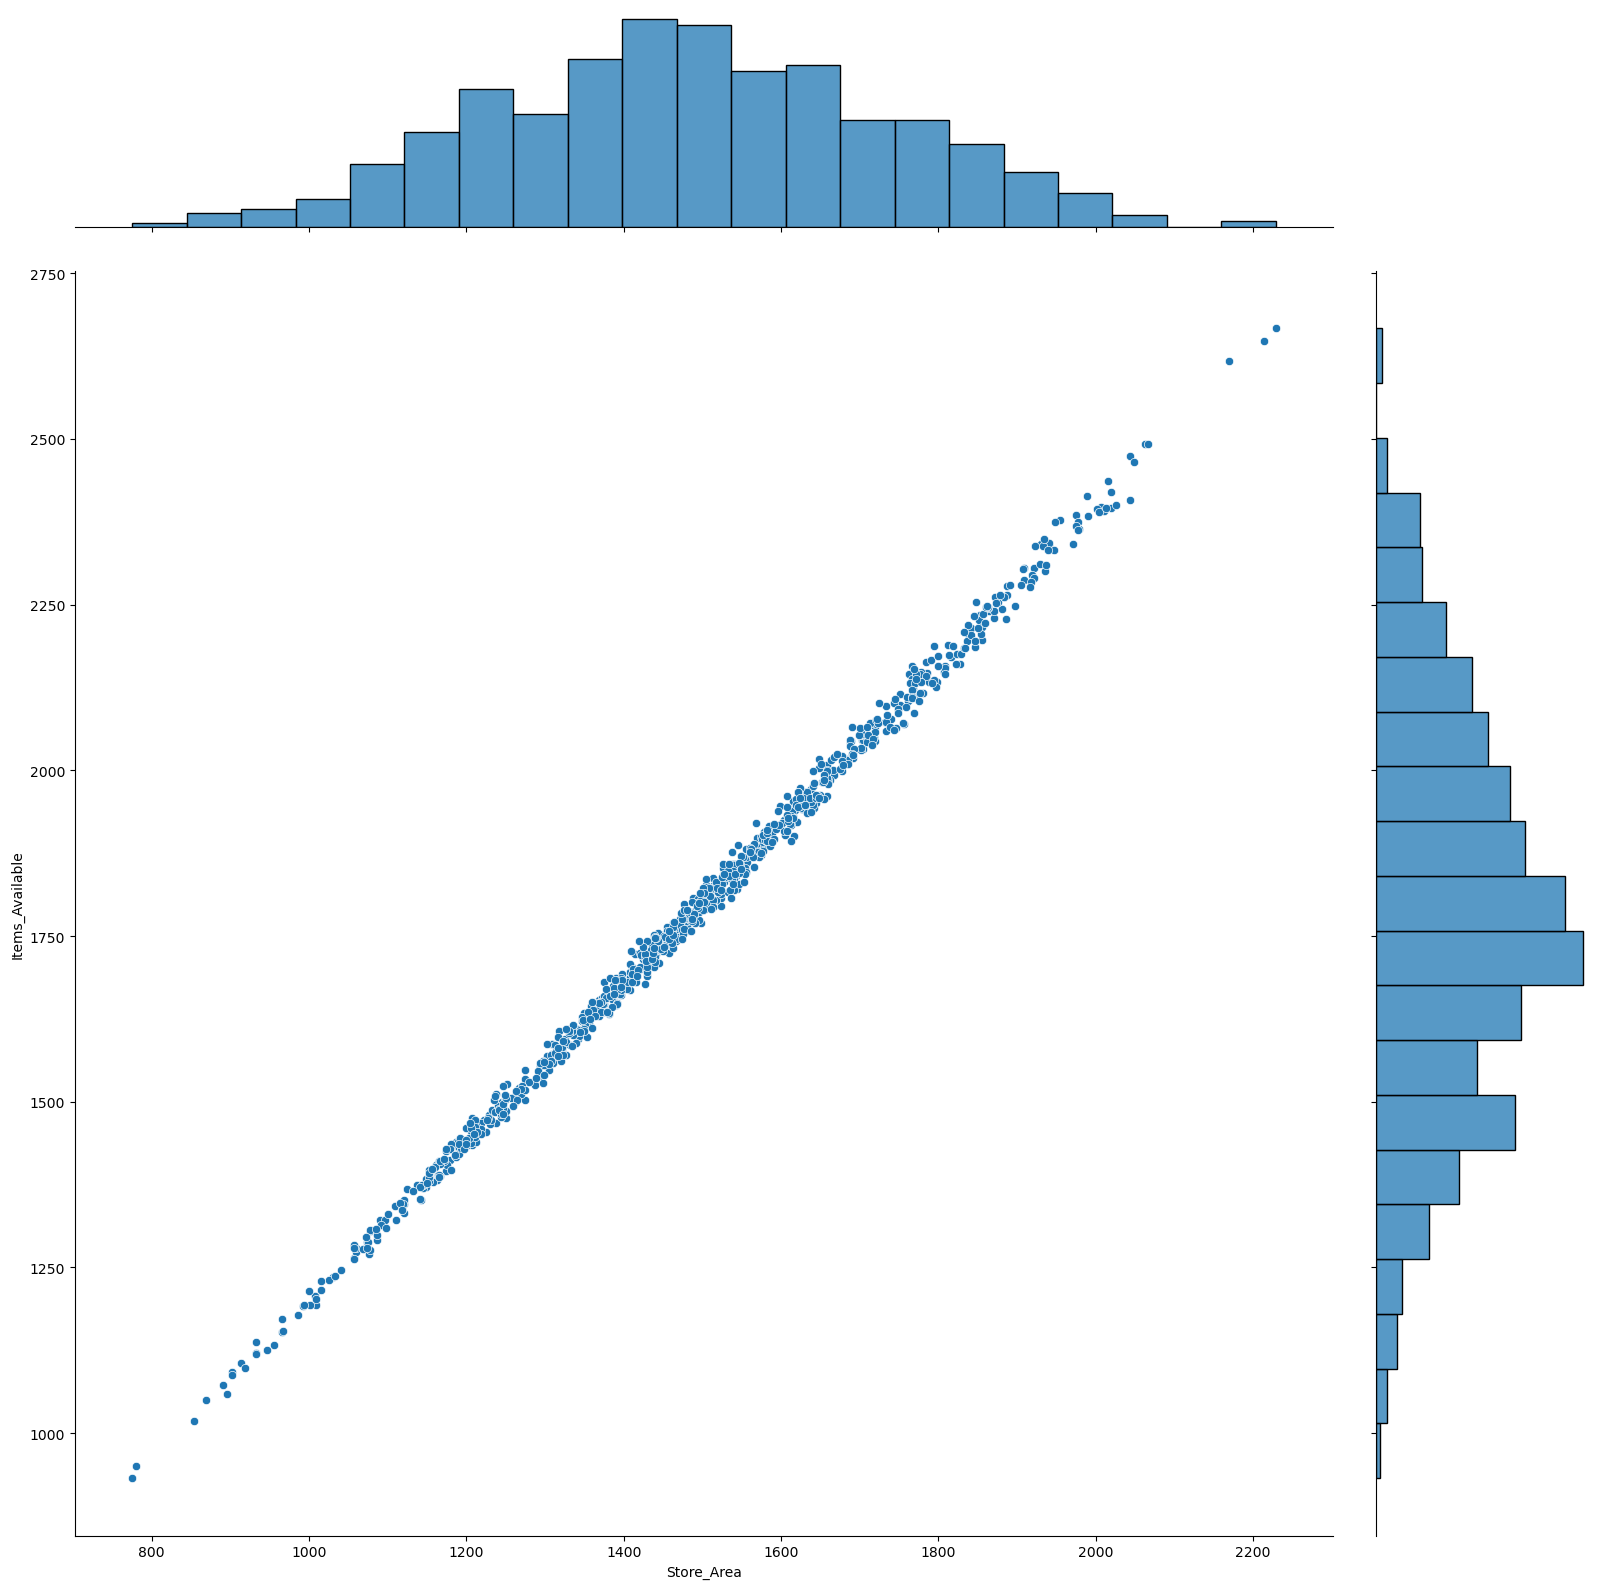

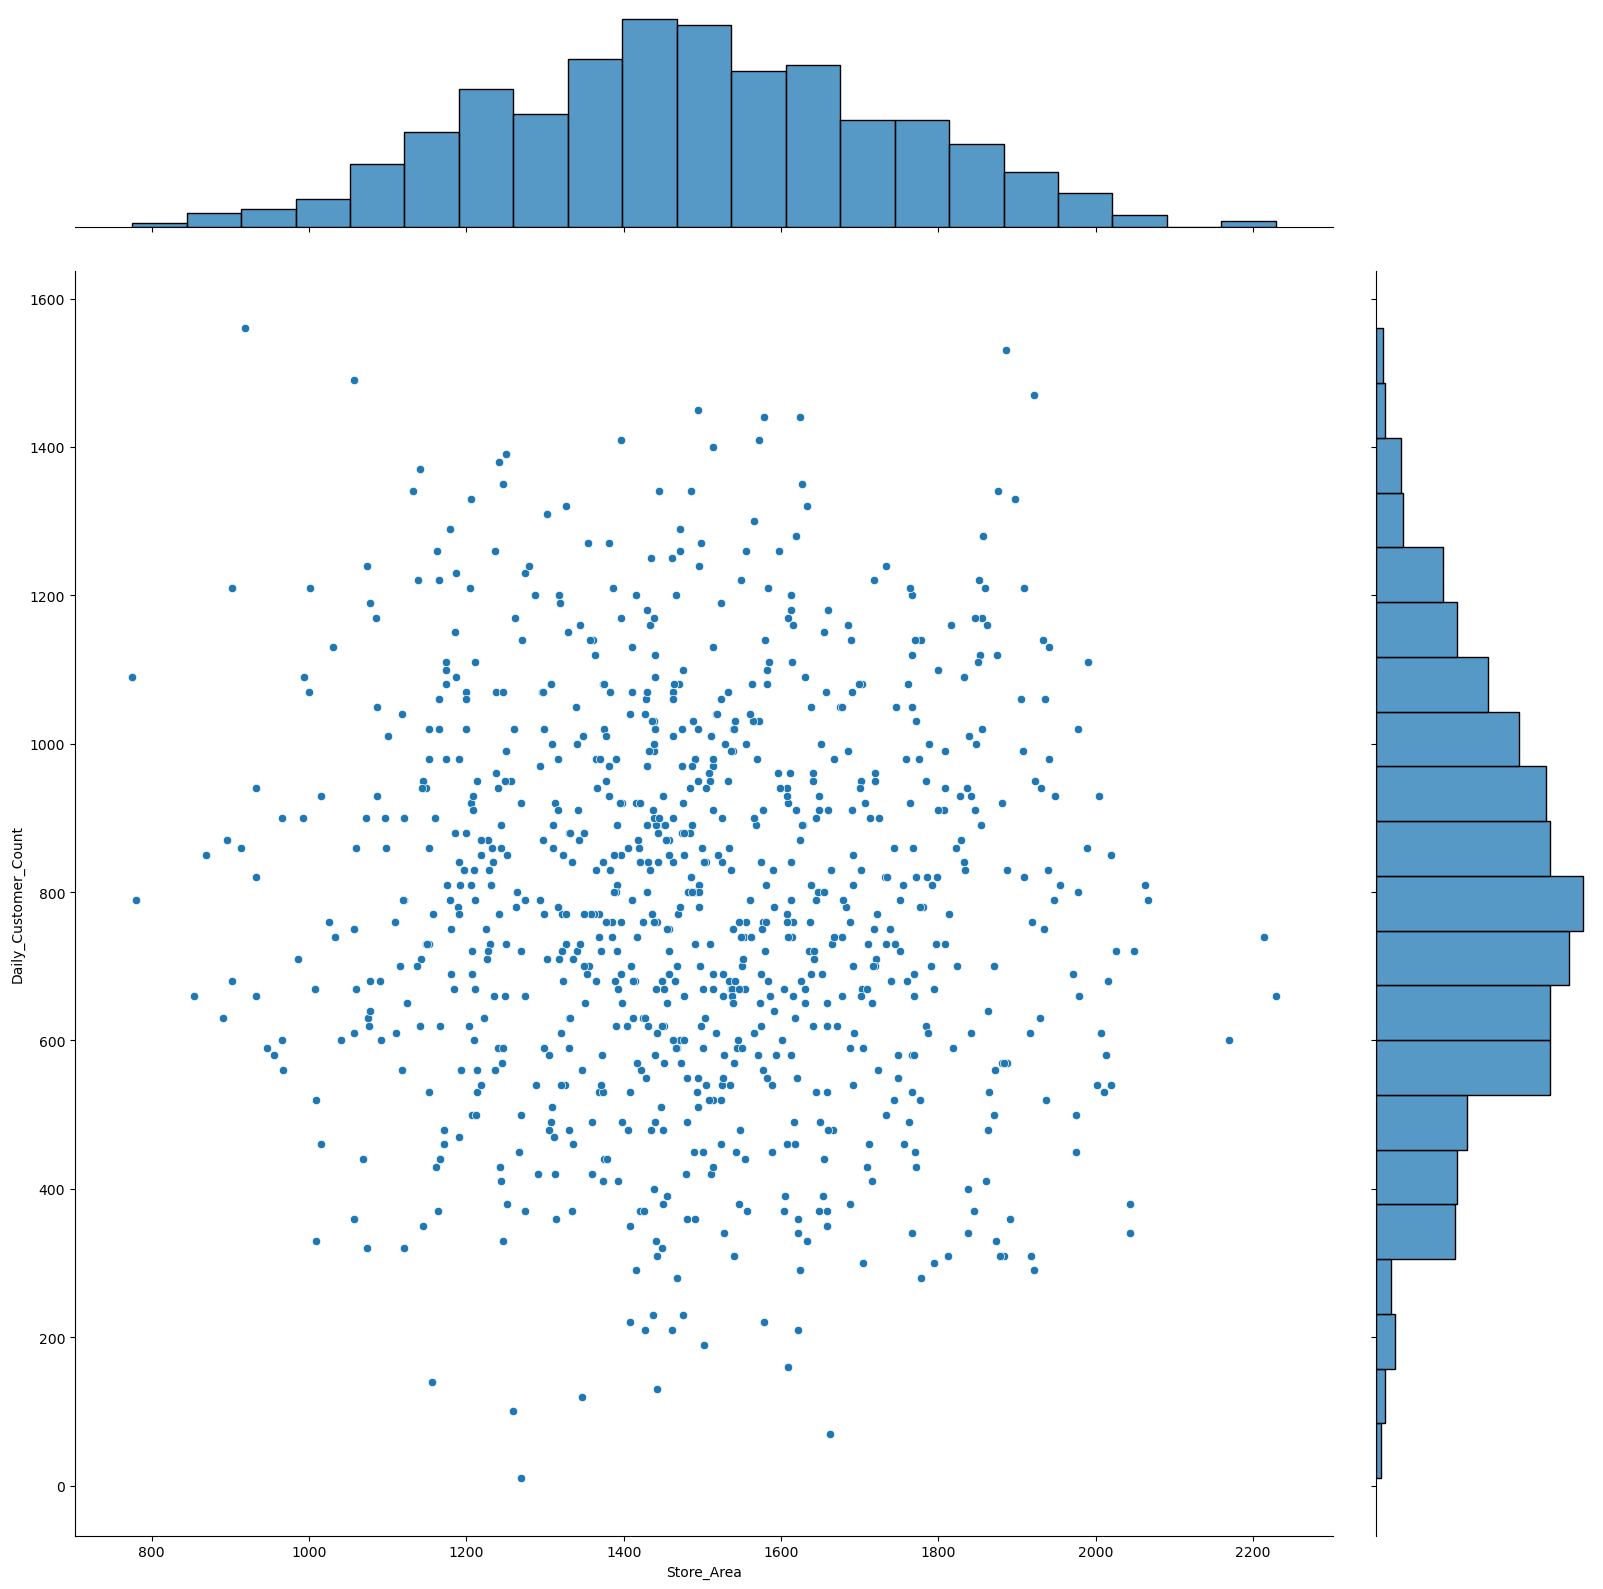

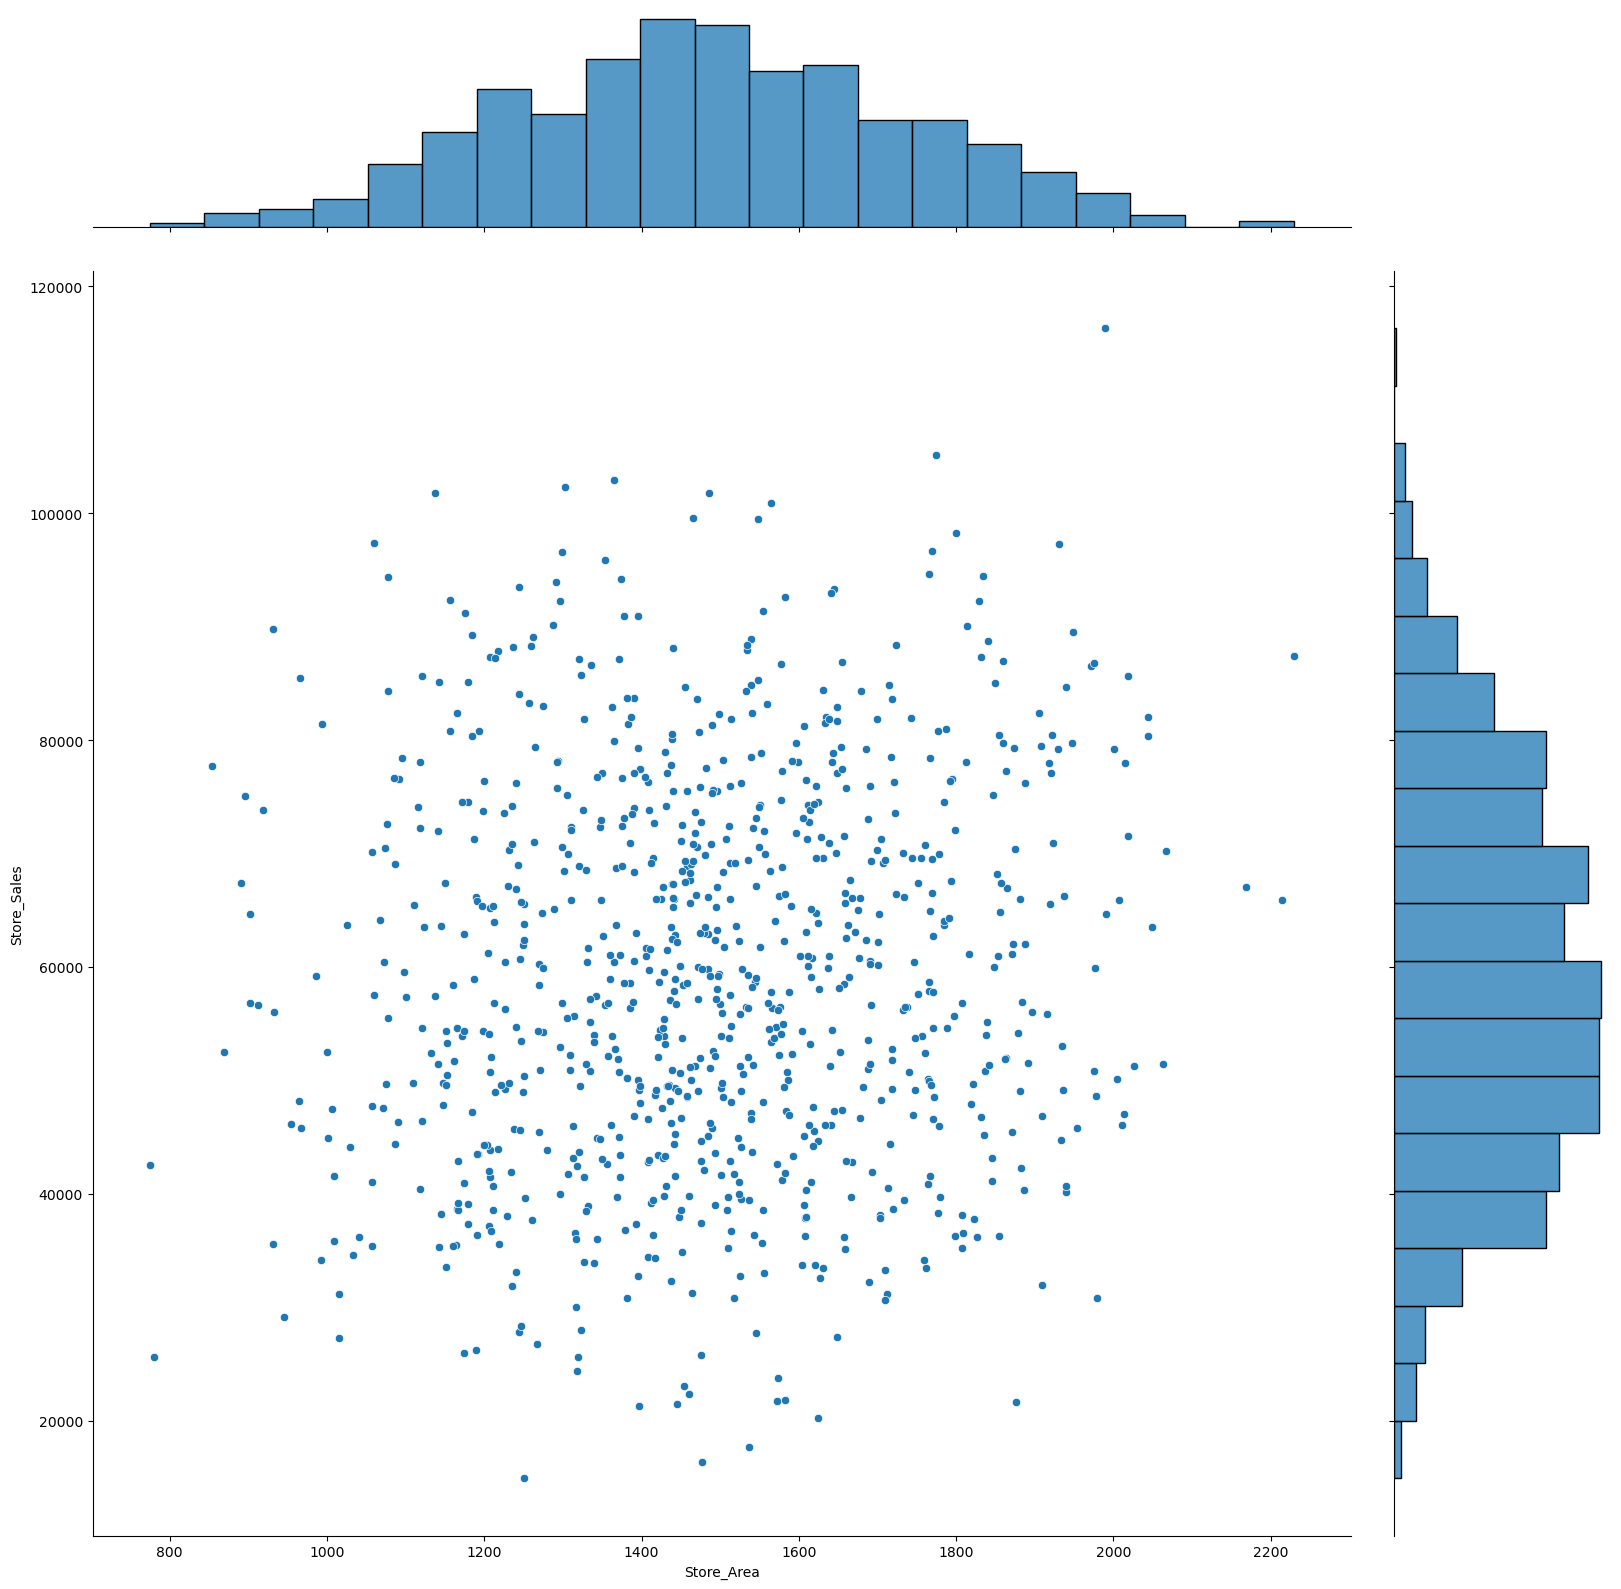

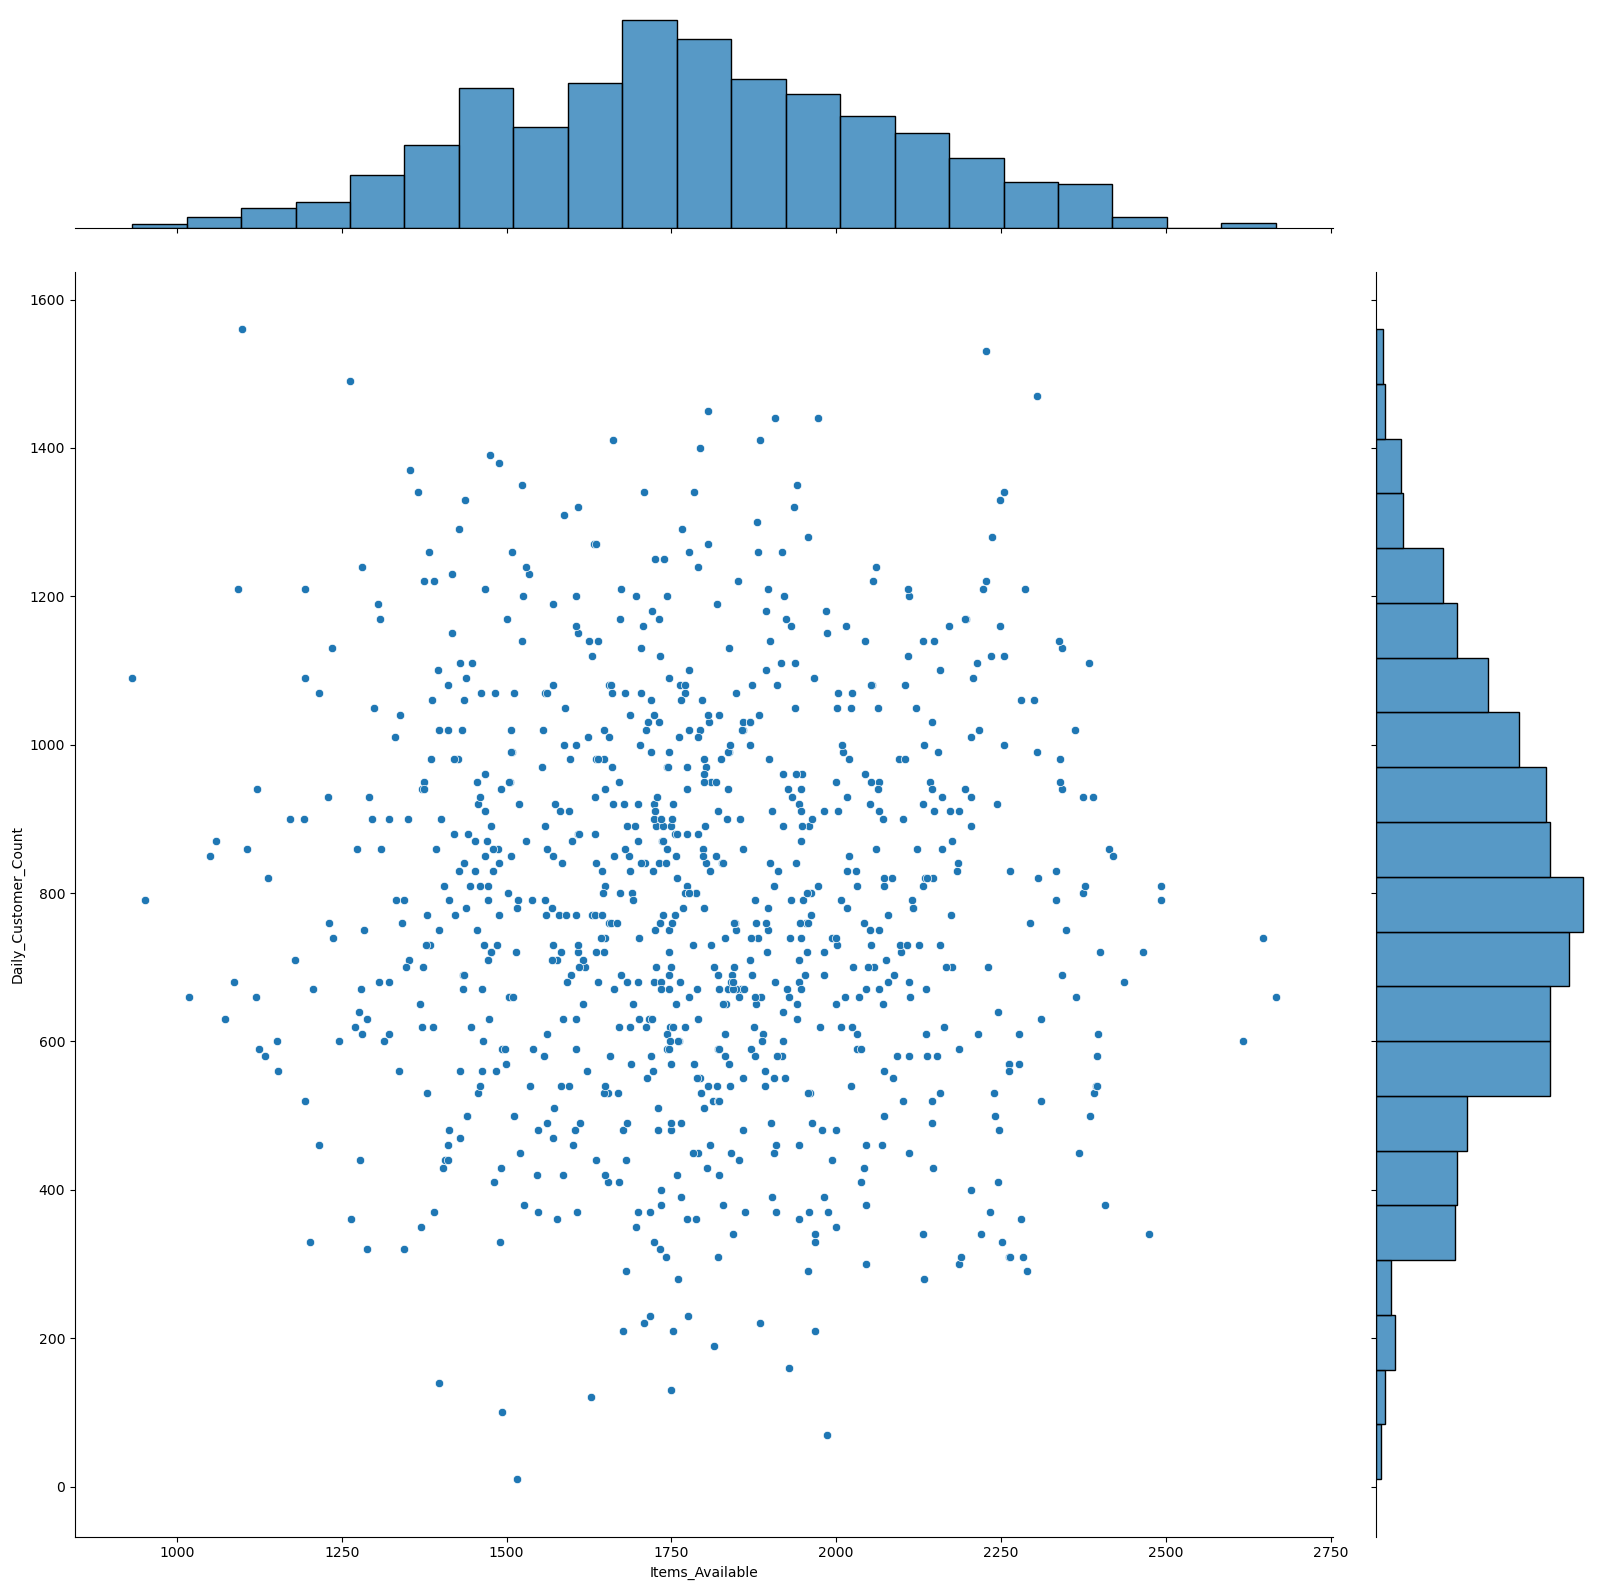

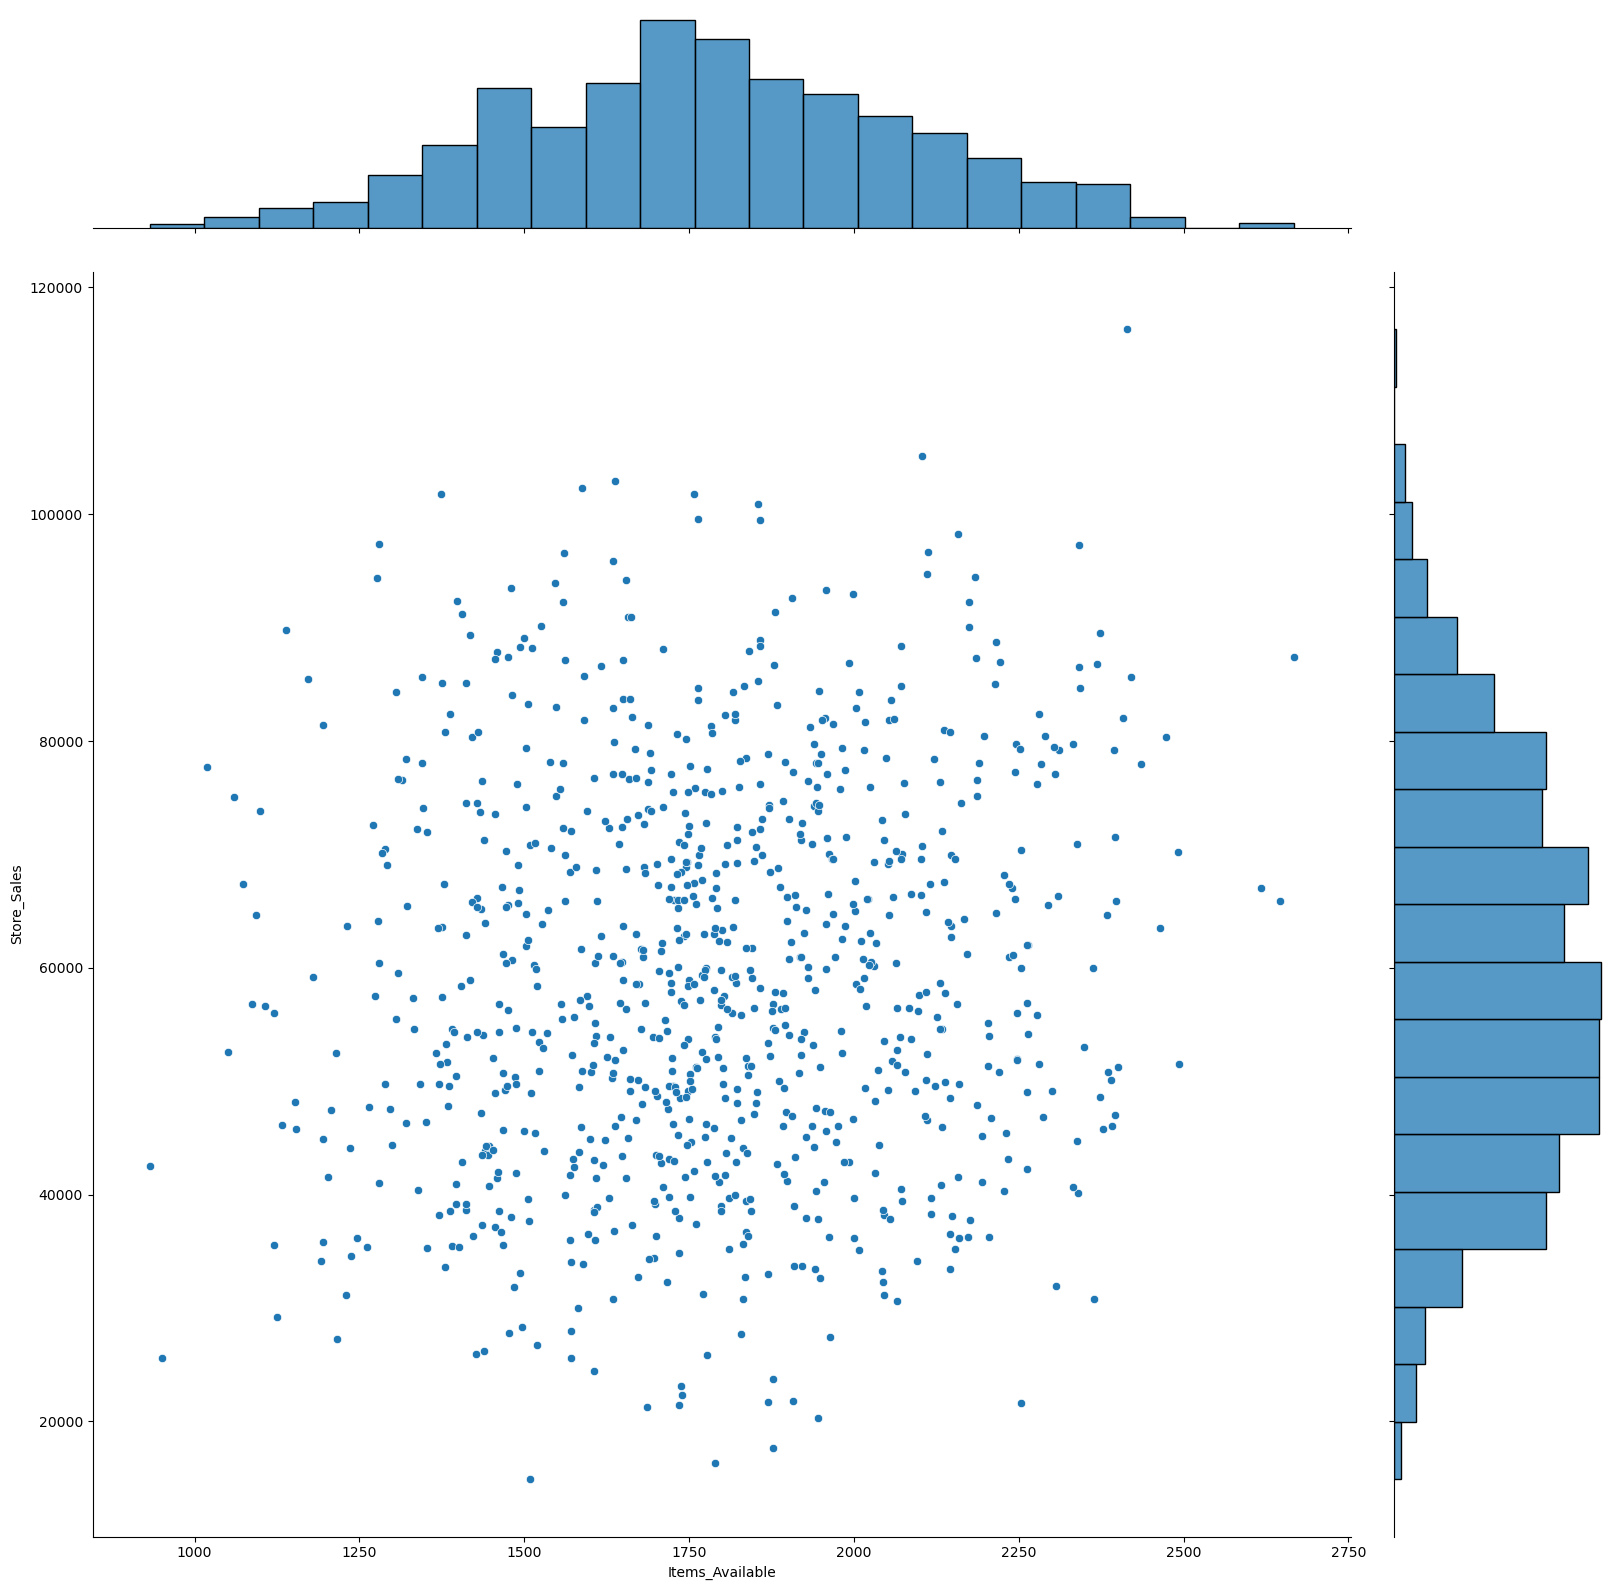

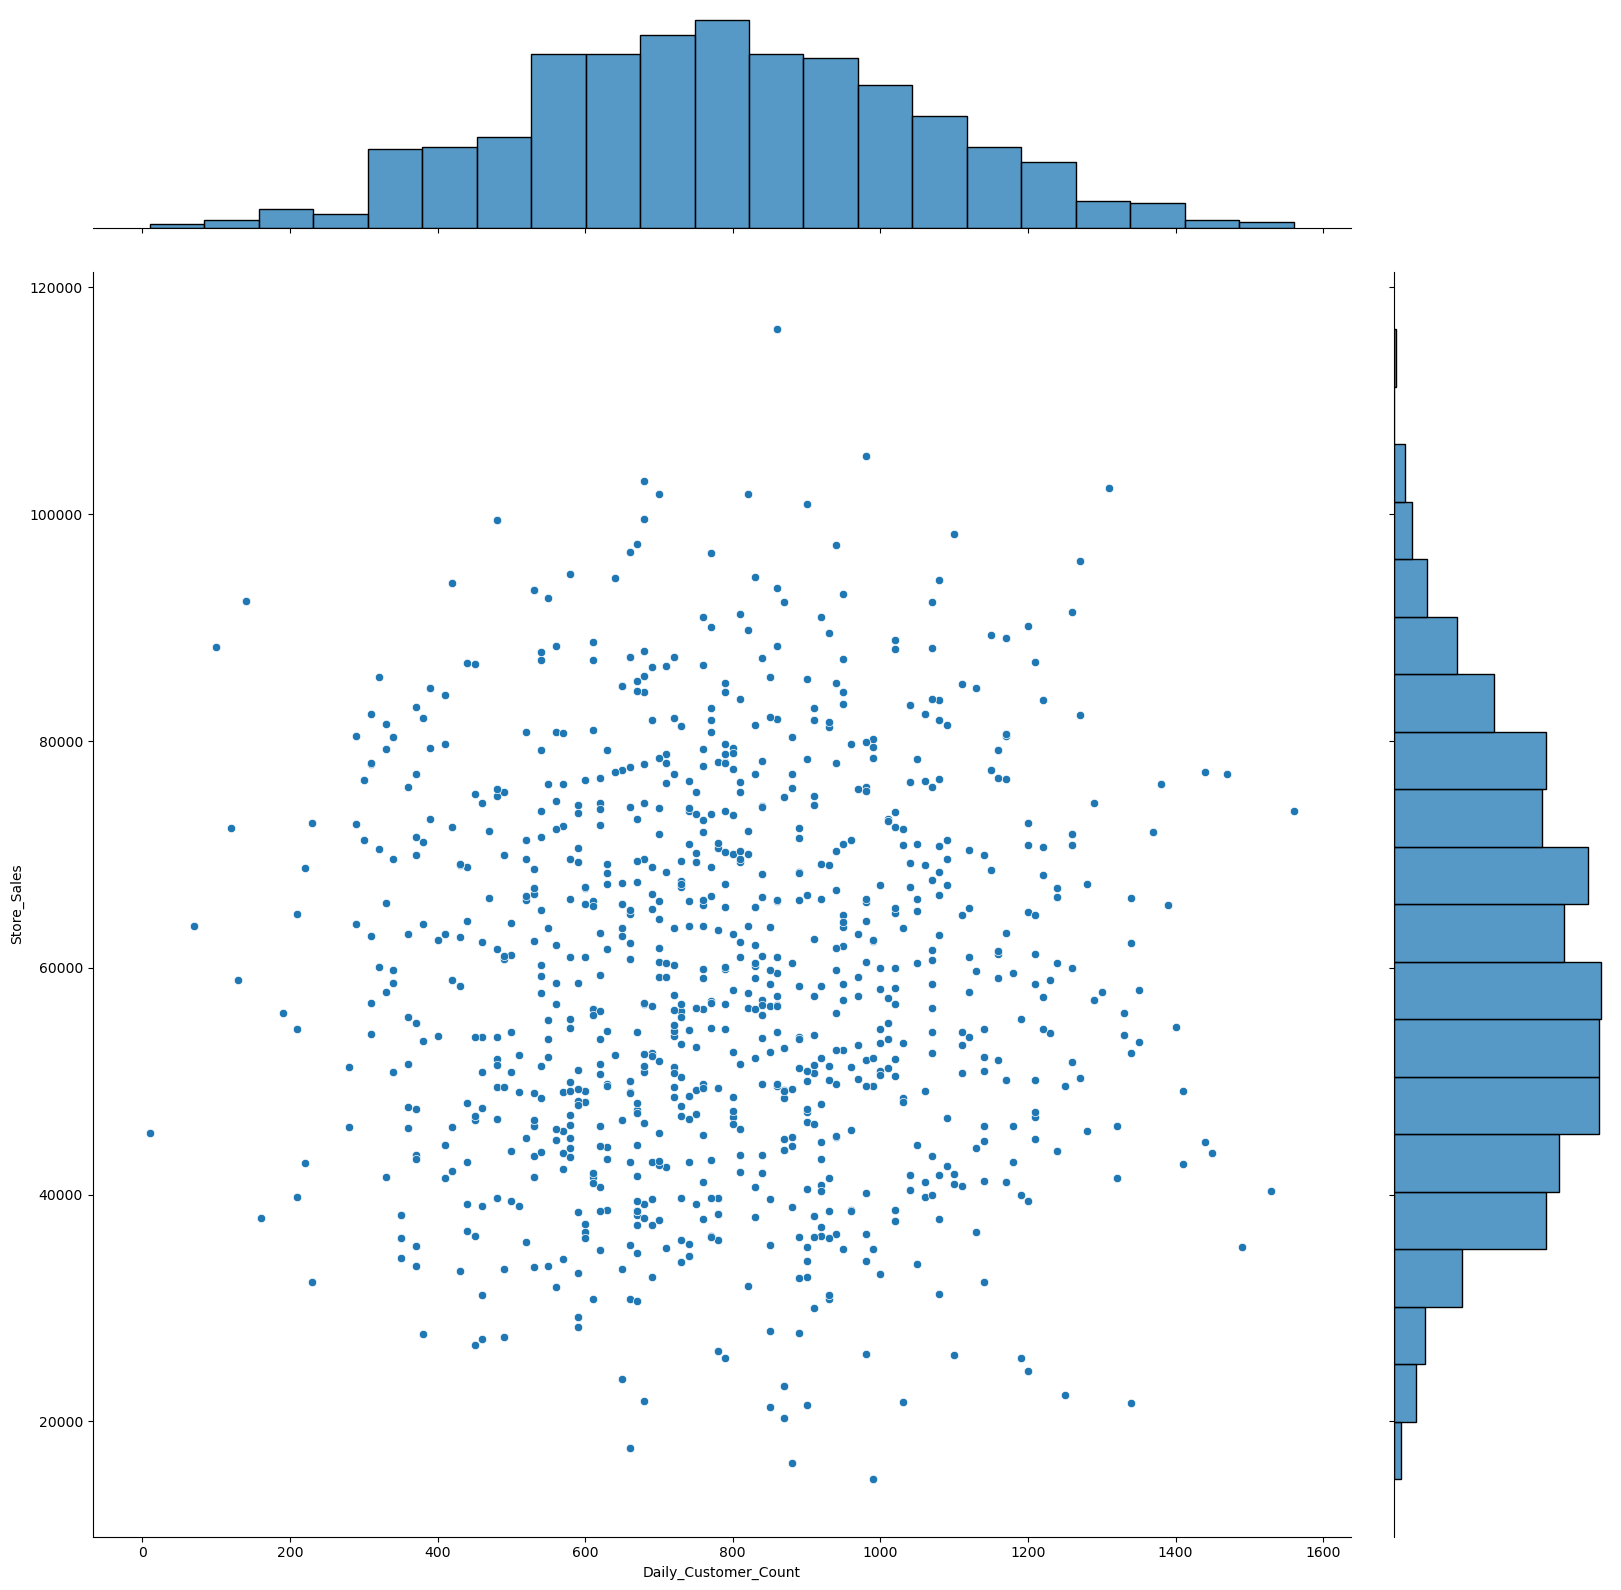

In [11]:
#draw x-y plots to show relationship between any two
for index in range(0, len(data_space[3])):
    sb.jointplot(data = data_space[3][index], x = data_space[3][index].columns[0], y = data_space[3][index].columns[1], height = 16)

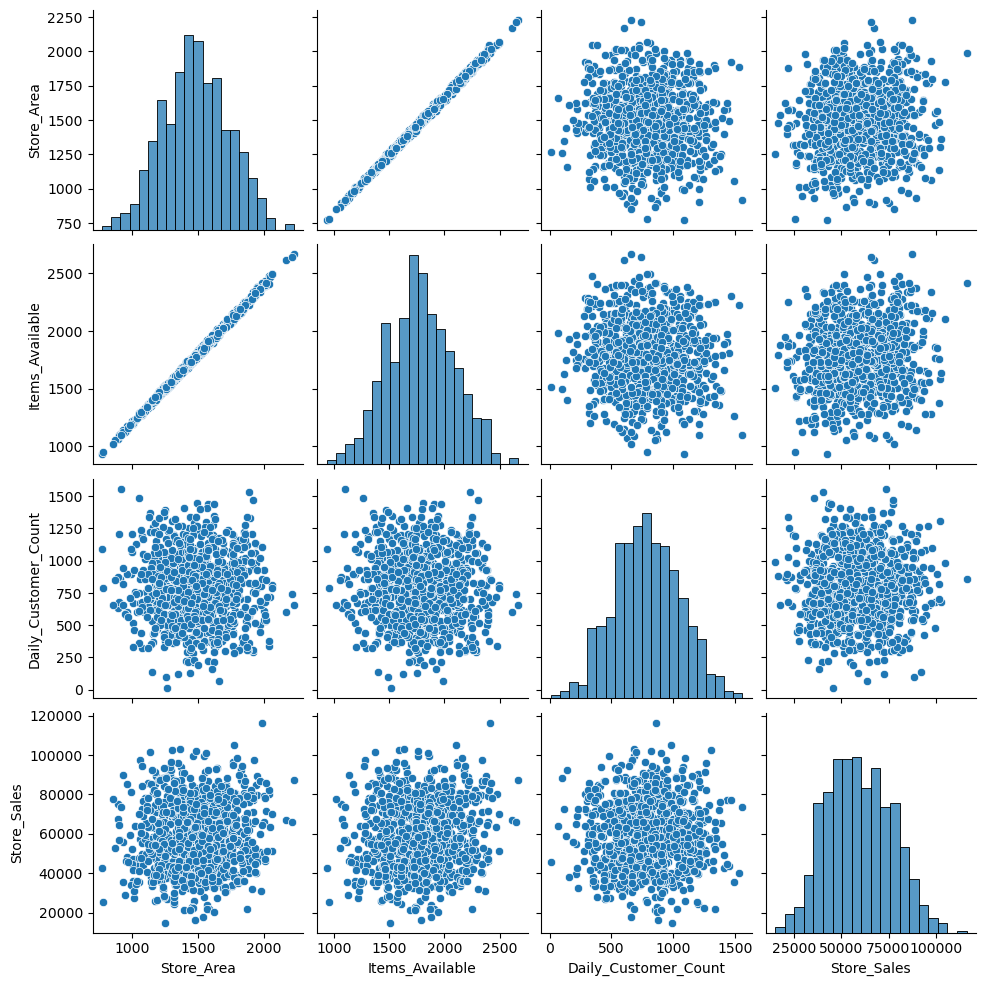

In [12]:
#do a pairplot for completeness
sb.pairplot(data = data_space[0])

In [13]:
#Get correlation matrix
data_space[0].corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


<AxesSubplot:>

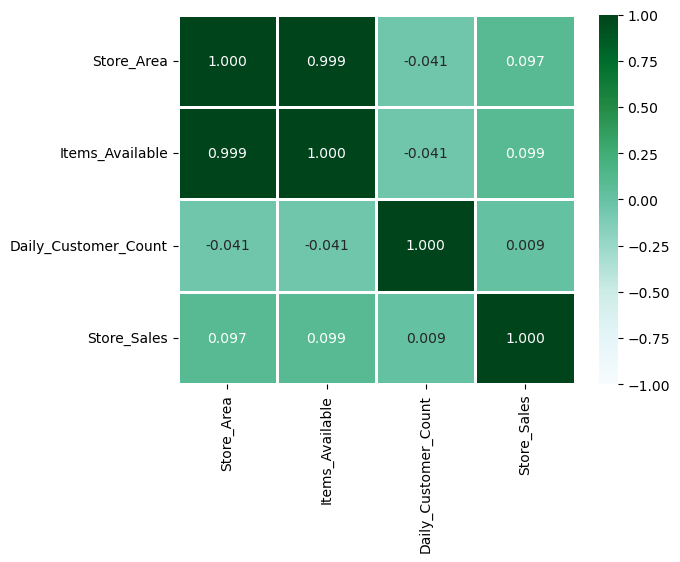

In [15]:
#print a heatmap for easy viewing
sb.heatmap(data = data_space[0].corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, cmap = "BuGn", fmt = ".3f")